In [ ]:
!pip install --upgrade pixiedust

    100% |████████████████████████████████| 122kB 2.8MB/s 
    100% |████████████████████████████████| 798kB 1.3MB/s 


In [1]:
import pixiedust

Pixiedust database opened successfully


In [2]:
accidents = pixiedust.sampleData("https://data.sfgov.org/api/views/vv57-2fgy/rows.csv?accessType=DOWNLOAD")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating pySpark DataFrame for 'https://data.sfgov.org/api/views/vv57-2fgy/rows.csv?accessType=DOWNLOAD'. Please wait...
Successfully created pySpark DataFrame for 'https://data.sfgov.org/api/views/vv57-2fgy/rows.csv?accessType=DOWNLOAD'



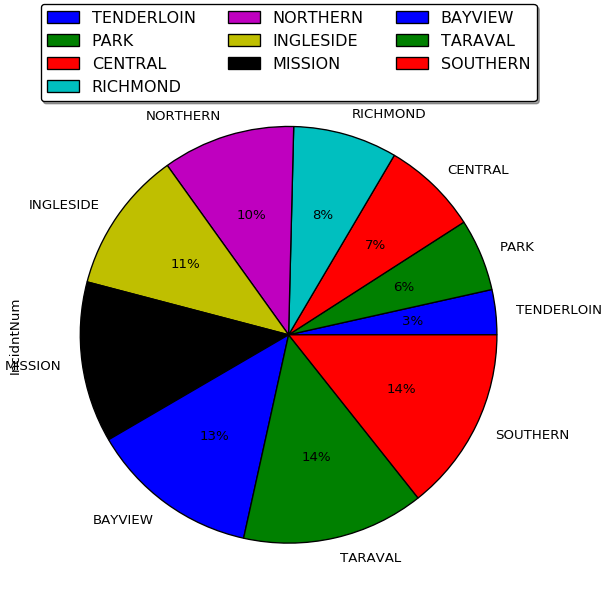

In [3]:
display(accidents)

In [6]:
!pip install --upgrade bokeh

    100% |████████████████████████████████| 7.0MB 171kB/s 
Requirement already up-to-date: six>=1.5.2 in /usr/local/src/bluemix_jupyter_bundle.v46/notebook/lib/python2.7/site-packages (from bokeh)
    100% |████████████████████████████████| 92kB 9.3MB/s 
    100% |████████████████████████████████| 256kB 3.9MB/s 
    100% |████████████████████████████████| 194kB 5.1MB/s 
    100% |████████████████████████████████| 348kB 5.2MB/s 
    100% |████████████████████████████████| 16.6MB 73kB/s 
    100% |████████████████████████████████| 491kB 2.5MB/s 
    100% |████████████████████████████████| 61kB 8.9MB/s 
    100% |████████████████████████████████| 133kB 1.6MB/s 
    100% |████████████████████████████████| 143kB 7.7MB/s 
    100% |████████████████████████████████| 378kB 3.1MB/s 
Requirement already up-to-date: singledispatch in /usr/local/src/bluemix_jupyter_bundle.v46/notebook/lib/python2.7/site-packages (from tornado>=4.3->bokeh)
  Running setup.py bdist_wheel for bokeh ... - \ | /


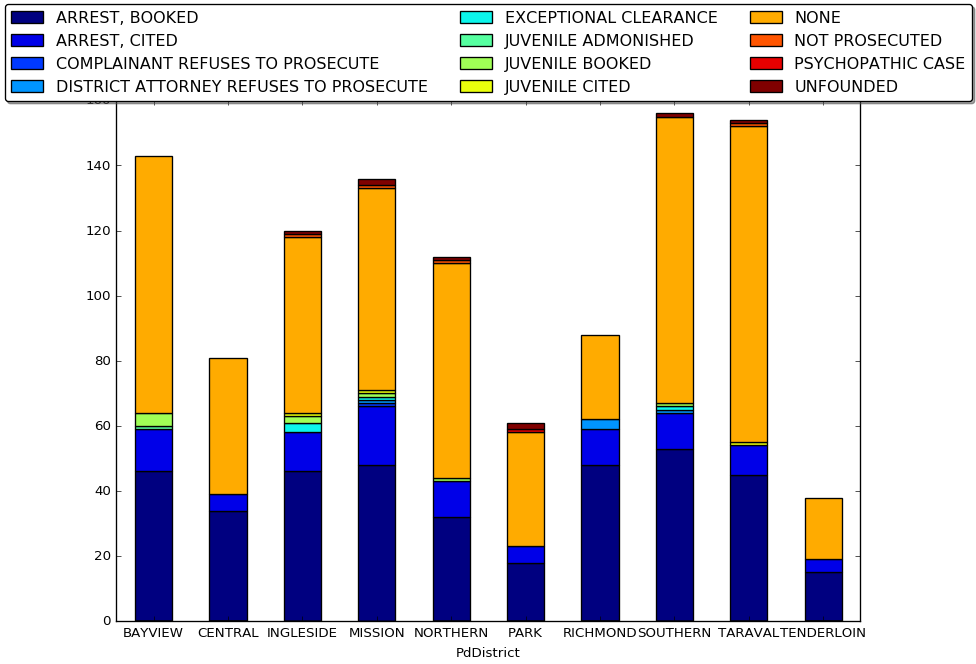

In [7]:
display(accidents)


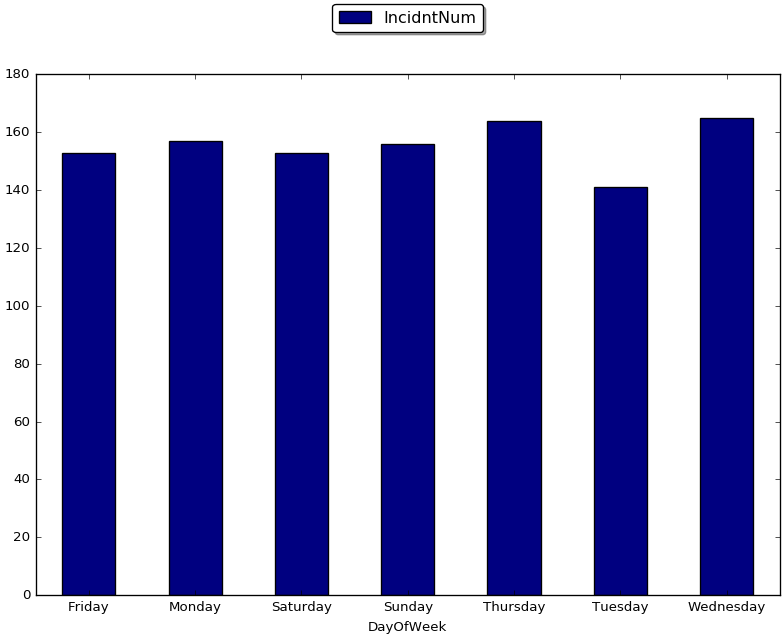

In [9]:
display(accidents)

In [10]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

# Get the hour value of a time string
# e.g. getHour("05:30") = 5
def getHour(s):
    return int(s.split(':')[0])

hr_udf = udf(getHour,IntegerType())

# Rename weekdays to enable mini time-series analysis
accidents = accidents.na.replace\
    (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],\
    ['1-Monday','2-Tuesday','3-Wednesday','4-Thursday','5-Friday','6-Saturday','7-Sunday'],\
    'DayOfWeek')

# Add Hour column and refine outcomes from traffic accidents
accidents = accidents.withColumn("Hour",hr_udf(accidents['Time']))\
    .withColumn("Res",\
    udf(lambda x: 'Arrest' if 'ARREST' in x else 'No Resolution' if x == 'NONE' else 'Other',StringType())\
    (accidents['Resolution']))


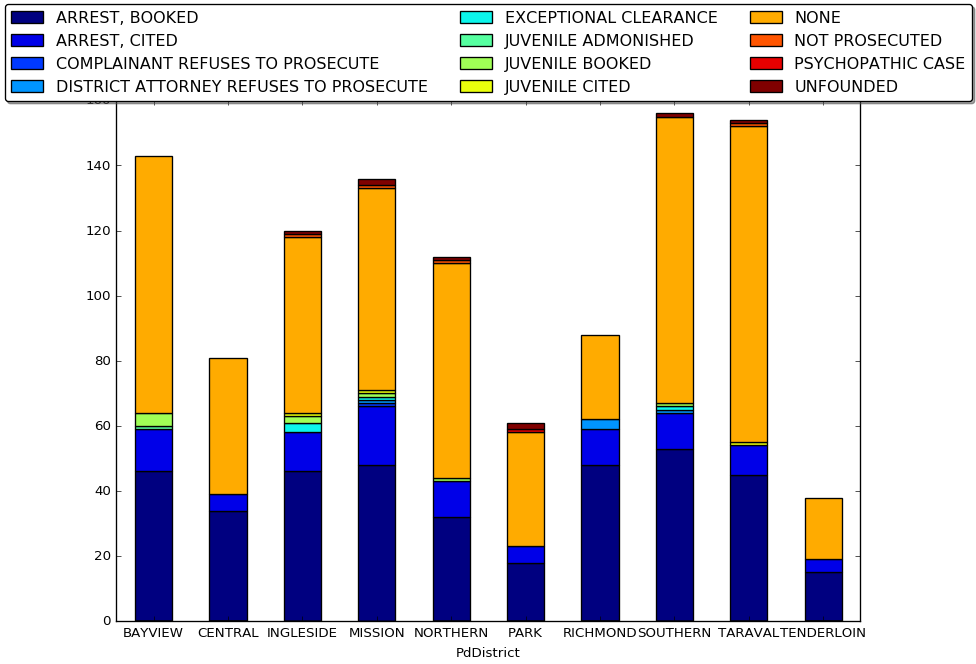

In [11]:
display(accidents)


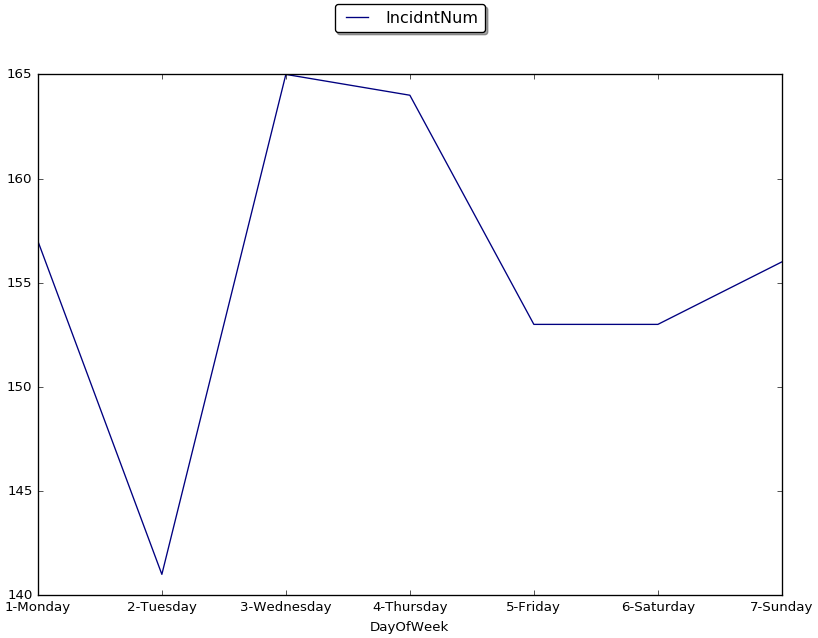

In [13]:
display(accidents)

In [12]:
display(accidents)

In [14]:
accidents.registerTempTable("accidents")
taraval = sqlContext.sql("SELECT * FROM accidents WHERE PdDistrict='TARAVAL'")

In [1]:
display(taraval)

NameError: name 'display' is not defined

In [2]:
display(taraval)

NameError: name 'display' is not defined

In [17]:
from pixiedust.display.app import *

In [19]:
@PixieApp
class HelloWorldPixieApp:
    @route()
    def main(self):
        return """
            <input pd_options="clicked=false" type="button" value="You Clicked, Now Go back">
        """
# run the app
HelloWorldPixieApp().run(runInDialog='false')

In [20]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase

@PixieApp
class SFDashboard(MapboxBase):
    def setup(self):
        self.mapJSONOptions = {
          "mapboxtoken": "pk.eyJ1IjoicmFqcnNpbmdoIiwiYSI6ImNqM2s4ZDg4djAwcGYyd3BwaGxwaDV3bWoifQ.d5Rklkdu5MeGAnXu1GMNYw",
          "chartsize": "90",
          "aggregation": "SUM",
          "rowCount": "500",
          "handlerId": "mapView",
          "rendererId": "mapbox",
          "valueFields": "IncidntNum",
          "keyFields": "X,Y",
          "basemap": "light-v9"
        }
        self.setLayers([
        {
            "name": "Speeding",
            "url": "https://data.sfgov.org/api/geospatial/mfjz-pnye?method=export&format=GeoJSON"
        },
        {
            "name": "Traffic calming",
            "url": "https://data.sfgov.org/api/geospatial/ddye-rism?method=export&format=GeoJSON",
            "type": "symbol",
            "layout": {
                "icon-image": "police-15",
                "icon-size": 1.5
            }
        },
        {
            "name": "Police Districts",
            "url": "https://data.sfgov.org/api/geospatial/wkhw-cjsf?method=export&format=GeoJSON"
        },
        {
            "name": "Crimes",
            "url": "https://data.sfgov.org/api/geospatial/ms8q-rzqw?method=export&format=GeoJSON",
            "paint":{
                "fill-color": "rgba(255,182,193,0.5)"
            }
        }
        ])
        
    def formatOptions(self,options):
        return ';'.join(["{}={}".format(key,value) for (key, value) in iteritems(options)])
    
    @route()
    def mainScreen(self):
        return """
<div class="well">
    <center><span style="font-size:x-large">Analyzing San Francisco Public Safety data with PixieDust</span></center>
    <center><span style="font-size:large"><a href="https://datasf.org/opendata" target="new">https://datasf.org/opendata</a></span></center>
</div>
<div class="row">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Layers</strong></div>
        {% for layer in this.layers %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="map{{prefix}}" pd_script="self.toggleLayer({{loop.index0}})">
            <label>{{layer["name"]}}</label>
        </div>      
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <div id="map{{prefix}}" pd_entity pd_options="{{this.formatOptions(this.mapJSONOptions)}}"/>
    </div>
</div>
"""
    
SFDashboard().run(accidents,runInDialog="false")
